<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/13_Convolutions_in_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**One dimensional convolutions**

A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

Multiply each window in the input array with the kernel and sum the multiplied result and allocate the result into the correct entry in the output array (conv).

In [0]:
import numpy as np

In [0]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


**Image convolutions**

The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. 

Here, we write the code that executes a convolution of an image with a kernel using Numpy. 

Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

In [0]:
!wget https://raw.githubusercontent.com/raj-vijay/dl/master/images/Brickwork.jpg

--2020-04-24 13:32:15--  https://raw.githubusercontent.com/raj-vijay/dl/master/images/Brickwork.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130417 (127K) [image/jpeg]
Saving to: ‘Brickwork.jpg’

Brickwork.jpg       100%[===================>] 127.36K  --.-KB/s    in 0.01s   

2020-04-24 13:32:15 (9.80 MB/s) - ‘Brickwork.jpg’ saved [130417/130417]



In [0]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [0]:
im = plt.imread('Brickwork.jpg')
im = rgb2gray(im)
im = im/255 

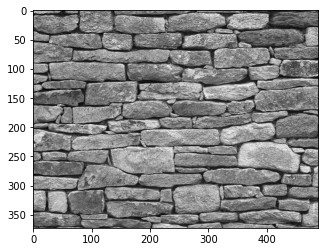

In [0]:
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

In [0]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[0.01188997 0.01328485 0.01462262 ... 0.         0.         0.        ]
 [0.0135029  0.01439153 0.01495935 ... 0.         0.         0.        ]
 [0.01502487 0.01461501 0.0138405  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


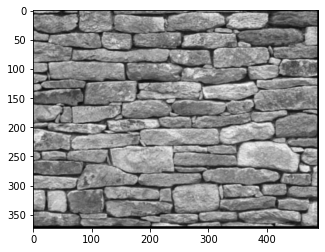

In [0]:
plt.imshow(result, cmap=plt.cm.gray)
plt.show()

**Defining image convolution kernels**

Earlier, we implemented a convolution given an image and a kernel. 

This code is now modified to a function called convolution() that takes two inputs: image and kernel and produces the convolved image. 

Now we will define kernels that will find a particular feature in the image.

In [0]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

**Kernel to find vertical line in images**

In [0]:
vertical = np.array([[-1, 1, -1], 
          [-1, 1, -1], 
          [-1, 1, -1]])

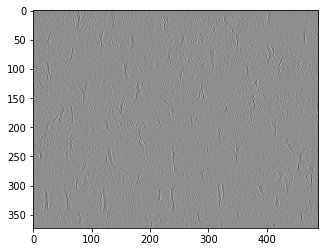

In [0]:
plt.imshow(convolution(im, vertical), cmap=plt.cm.gray)
plt.show()

**Kernel to find horizontal lines in images**

In [0]:
horizontal = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1,-1]])

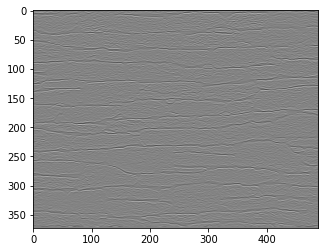

In [0]:
plt.imshow(convolution(im, horizontal), cmap=plt.cm.gray)
plt.show()

**Kernel to find light spots surrounded by dark pixels**

In [0]:
light = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

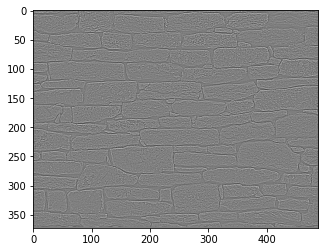

In [0]:
plt.imshow(convolution(im, light), cmap=plt.cm.gray)
plt.show()

**Kernel to find a dark spots surrounded by bright pixels**

In [0]:
dark = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

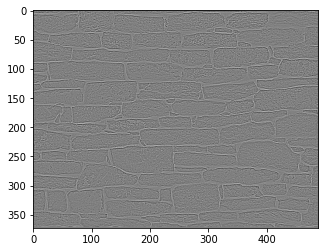

In [0]:
plt.imshow(convolution(im, dark), cmap=plt.cm.gray)
plt.show()